In [1]:
# Code for loading data 
import pandas as pd
import numpy as np

i_cols = ['Movie Id', 'Movie Title' ,'Unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('movies.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(movies.shape)
movies = np.asarray(movies)
print(movies[0])

i_cols = ['User Id', 'Movie ID' ,'Rating']

ratings = pd.read_csv('data.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(ratings.shape)
ratings = np.asarray(ratings)
print(ratings[0])

# U's and V's from Daniel's part
U1 = np.loadtxt('U1.txt')
V1 = np.loadtxt('V1.txt')

U2 = np.loadtxt('U2.txt')
V2 = np.loadtxt('V2.txt')

(1682, 21)
[1 'Toy Story (1995)' 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100000, 3)
[196 242   3]


In [2]:
# Off the shelf implementation: Surprise library
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy


def run_surprise():
    reader = Reader(name=None, line_format=u'user item rating', sep=None, rating_scale=(1, 5), skip_lines=0)
    
    train_data = Dataset.load_from_file('train.txt', reader)
    test_data = Dataset.load_from_file('test.txt', reader)
    
    train_data = train_data.build_full_trainset()
    test_data = test_data.build_full_trainset().build_testset()

    algo = SVD()
    
    algo.fit(train_data)
    predictions = algo.test(test_data)

    # Then compute RMSE
    accuracy.rmse(predictions)

    U_surprise = algo.pu
    V_surprise = algo.qi
    
    return U_surprise, V_surprise

U_surprise, V_surprise = run_surprise()

RMSE: 0.9302


In [3]:
# Visualization for matrix factorizations

import matplotlib.pyplot as plt
%matplotlib inline

def visualization(V, inds, name):
    fig = plt.gcf()
    fig.set_size_inches(10, 7)

    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :2].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds[i])[0],1][0] for i in range(len(inds))]
    plt.scatter(plot_x, plot_y)
    for i, txt in enumerate(names):
        plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    plt.xlabel('V dimension 1')
    plt.ylabel('V dimension 2')
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()
    

(2, 20)
(2, 1682)


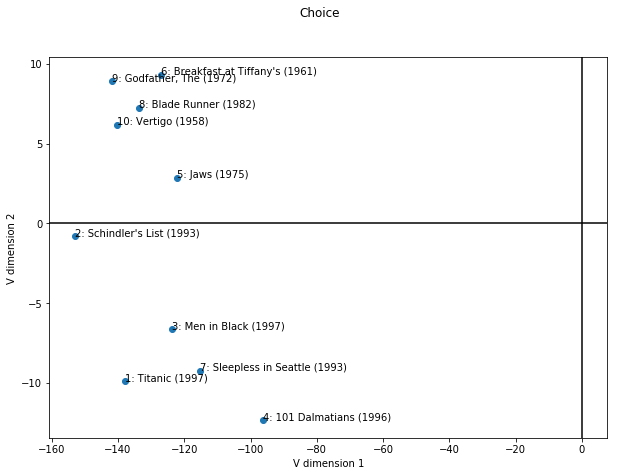

(2, 20)
(2, 1682)


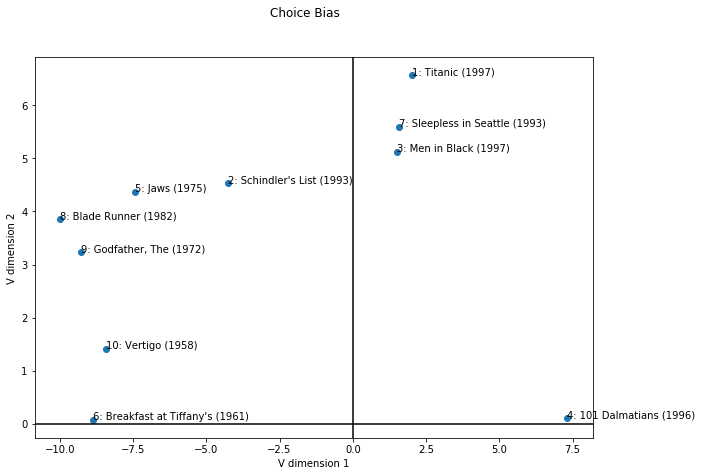

(2, 100)
(2, 1668)


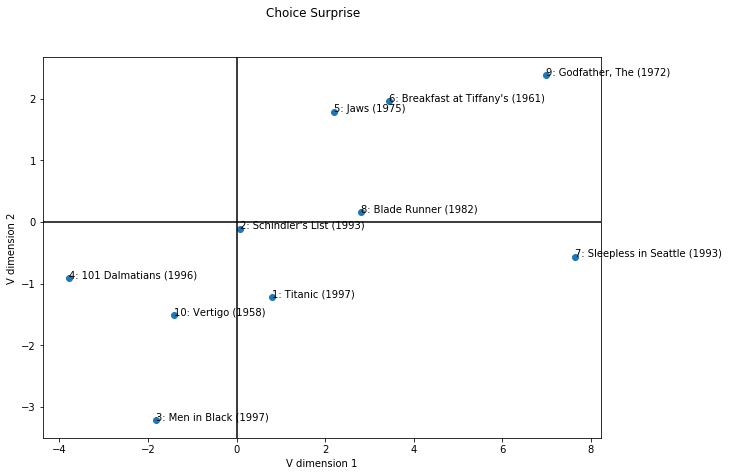

(2, 20)
(2, 1682)


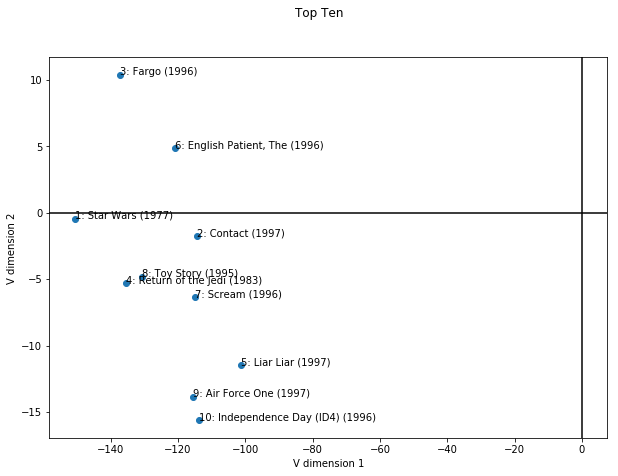

(2, 20)
(2, 1682)


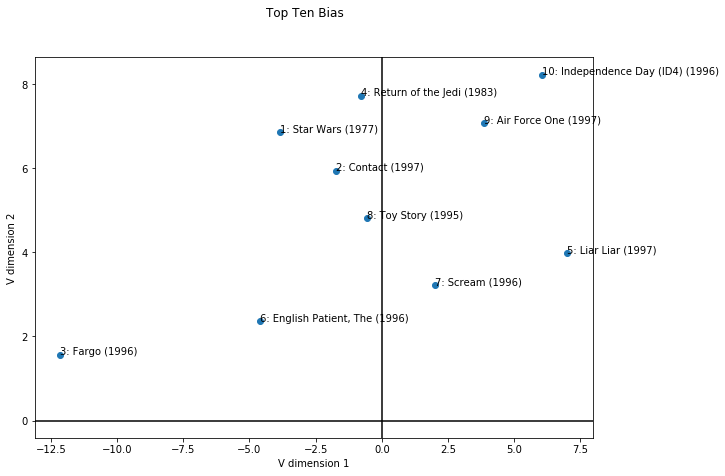

(2, 100)
(2, 1668)


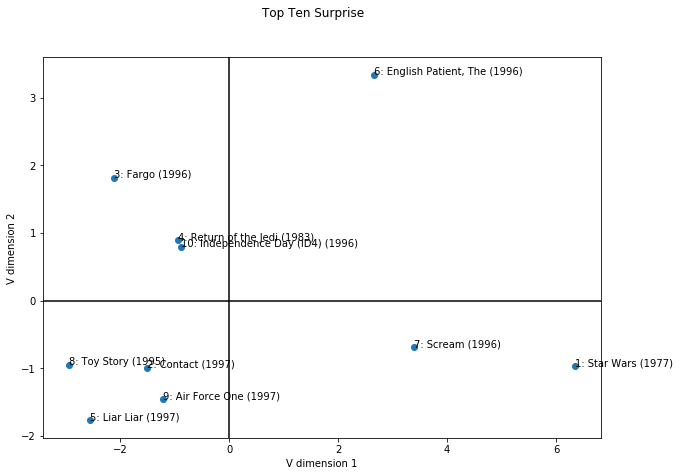

(2, 20)
(2, 1682)


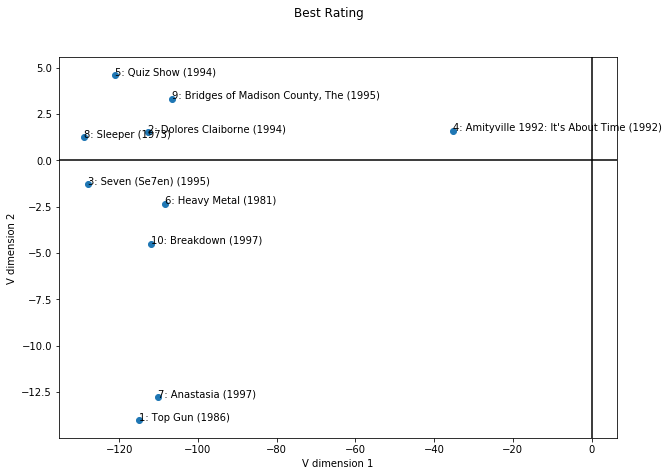

(2, 20)
(2, 1682)


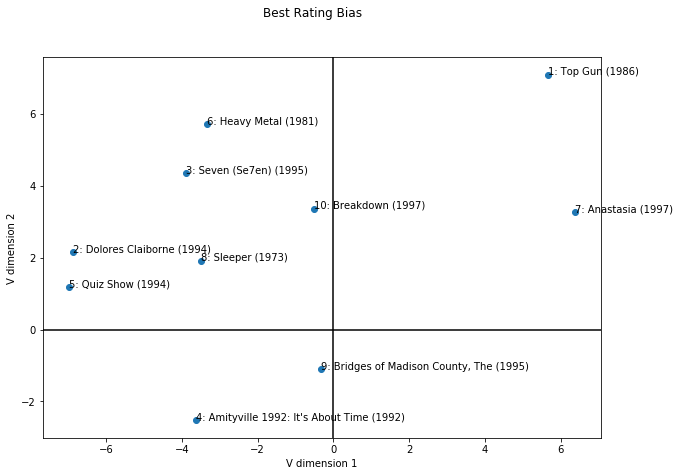

(2, 100)
(2, 1668)


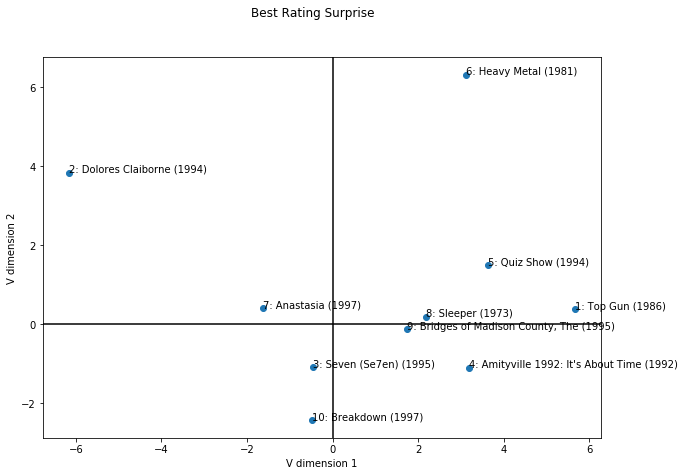

(2, 20)
(2, 1682)


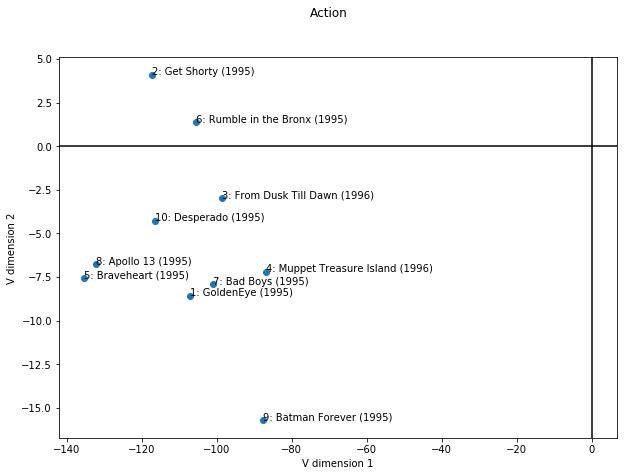

(2, 20)
(2, 1682)


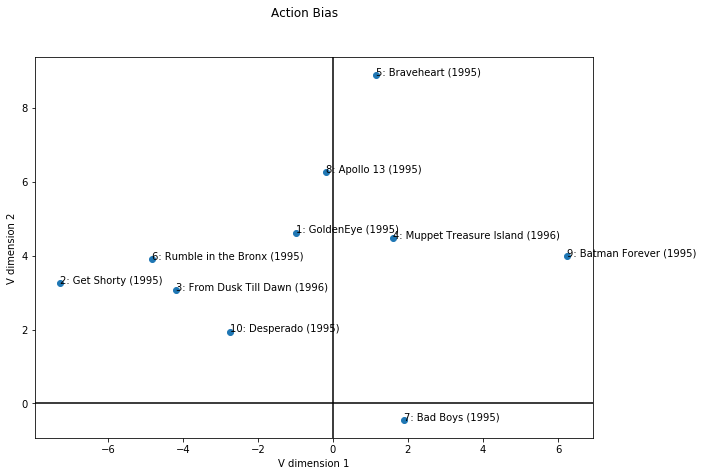

(2, 100)
(2, 1668)


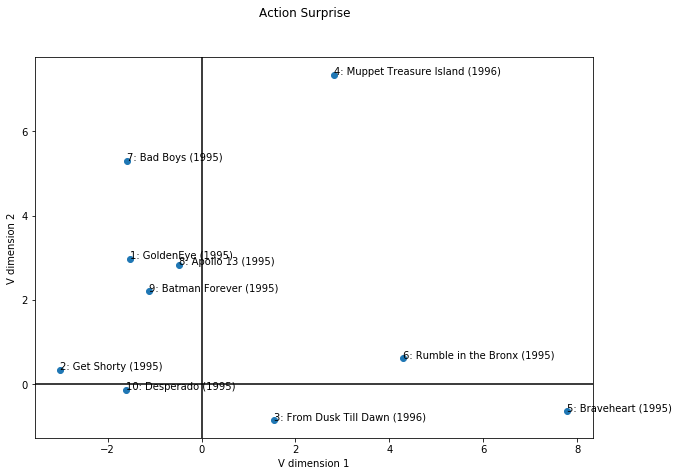

(2, 20)
(2, 1682)


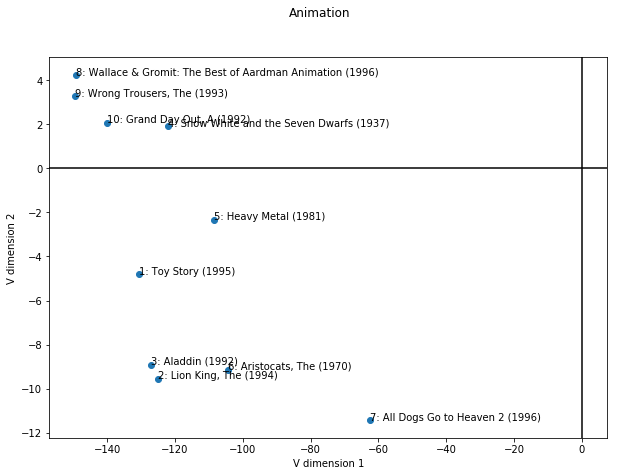

(2, 20)
(2, 1682)


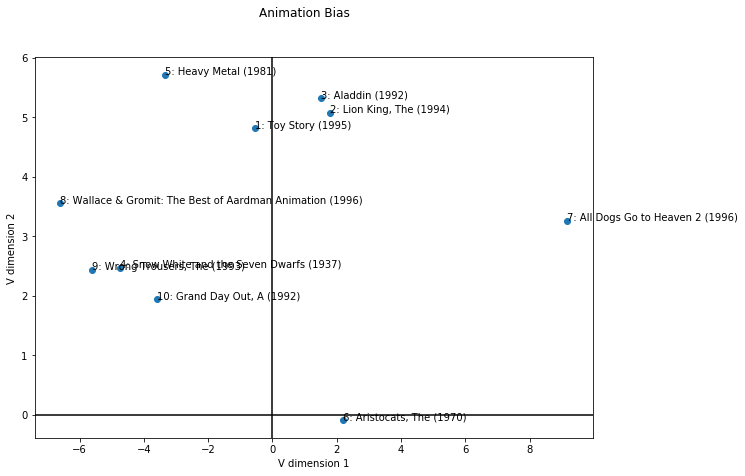

(2, 100)
(2, 1668)


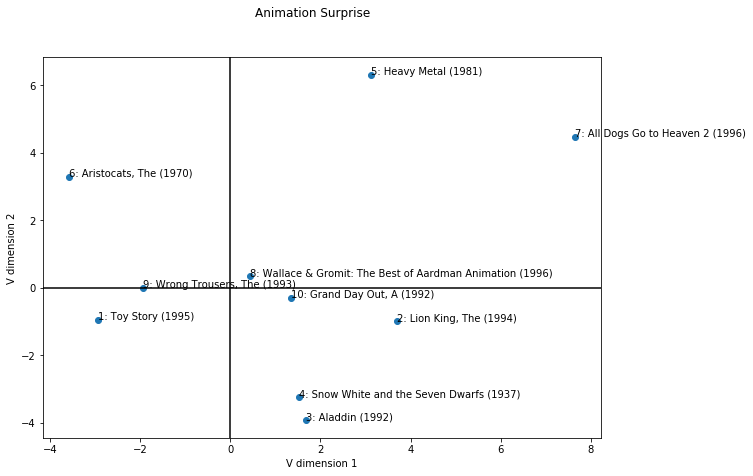

(2, 20)
(2, 1682)


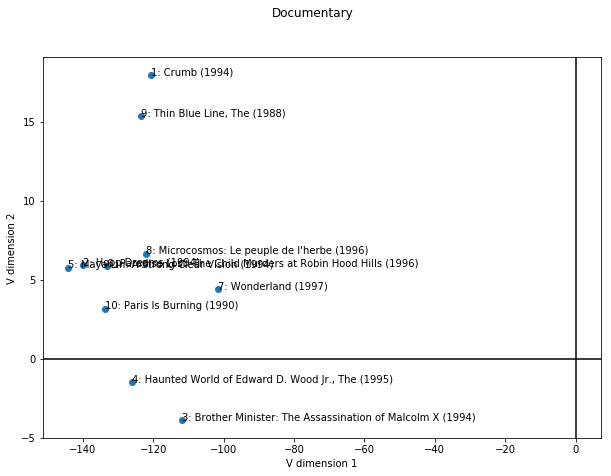

(2, 20)
(2, 1682)


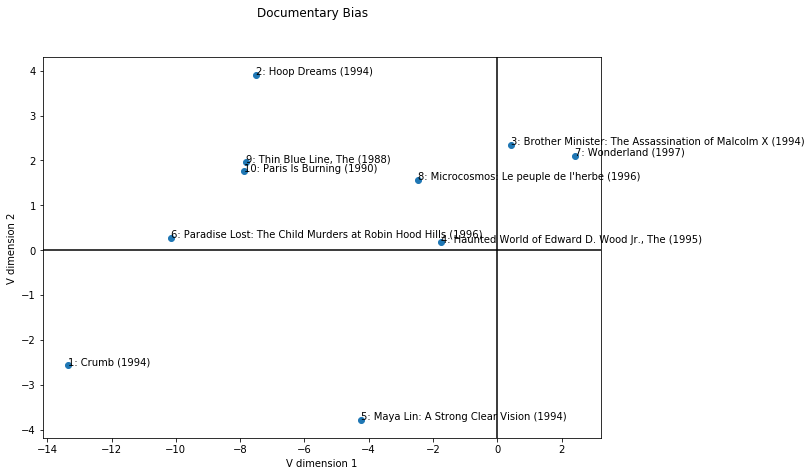

(2, 100)
(2, 1668)


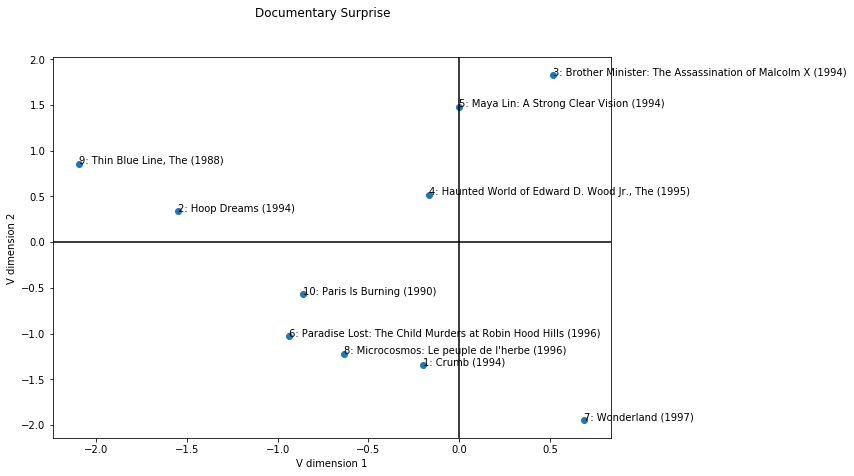

<Figure size 432x288 with 0 Axes>

In [4]:
from matplotlib import rc
from collections import Counter

# My choice movies
def my_choice():
    # By movie id: Titanic, Schindler's List, Men in Black, 101 Dalmations, Jaws, Breakfast at Tiffany's
    # Sleepless in Seattle, Blade Runner, The Godfather, Vertigo
    top_ten=np.asarray([313, 318, 257, 225, 234, 131, 88, 89, 127, 479])

    visualization(V1, top_ten, "Choice")
    visualization(V2, top_ten, "Choice Bias")
    visualization(V_surprise, top_ten, "Choice Surprise")


# Top ten most popular movies
def most_popular():
    movie_ids = ratings[:, 1]
    counter = Counter(movie_ids)
    # top_ten has format: id
    top_ten = []
    for i in counter.most_common(10):
        top_ten.append(i[0])
    top_ten=np.asarray(top_ten)

    visualization(V1, top_ten, "Top Ten")
    visualization(V2, top_ten, "Top Ten Bias")
    visualization(V_surprise, top_ten, "Top Ten Surprise")


# Top ten highest rated
def best_rated():
    sums = []
    for i in range(len(movies)):
        sums.append([movies[i][0], 0, 0])
    for i in range (100000):
        sums[[row[0] for row in sums].index(ratings[i][1])][1]+=ratings[i][2]
        sums[[row[0] for row in sums].index(ratings[i][1])][2]+=1
    sums = [row for row in sums if row[2]>20]
    avgs = [[sums[i][0], sums[i][1]/sums[i][2]] for i in range(len(sums))]
    avgs = np.array(avgs)
    top_ten_ind = np.argpartition(avgs[:,1], -10)[-10:]

    visualization(V1, top_ten_ind, "Best Rating")
    visualization(V2, top_ten_ind, "Best Rating Bias")
    visualization(V_surprise, top_ten_ind, "Best Rating Surprise")
    
def action_genre():
    action_movies = []
    for i in range(len(movies)):
        if movies[i][3] == 1:
            action_movies.append(movies[i, 0])
    action_movies = np.asarray(action_movies)
    
    visualization(V1, action_movies[:10], "Action")
    visualization(V2, action_movies[:10], "Action Bias")
    visualization(V_surprise, action_movies[:10], "Action Surprise")
    
def animation_genre():
    animation_movies = []
    for i in range(len(movies)):
        if movies[i][5] == 1:
            animation_movies.append(movies[i, 0])
    animation_movies = np.asarray(animation_movies)
    
    visualization(V1, animation_movies[:10], "Animation")
    visualization(V2, animation_movies[:10], "Animation Bias")
    visualization(V_surprise, animation_movies[:10], "Animation Surprise")
    
def documentary_genre():
    documentary_movies = []
    for i in range(len(movies)):
        if movies[i][9] == 1:
            documentary_movies.append(movies[i, 0])
    documentary_movies = np.asarray(documentary_movies)
    
    visualization(V1, documentary_movies[:10], "Documentary")
    visualization(V2, documentary_movies[:10], "Documentary Bias")
    visualization(V_surprise, documentary_movies[:10], "Documentary Surprise")


my_choice()
most_popular()
best_rated()
action_genre()
animation_genre()
documentary_genre()
            

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(2, 20)
(2, 1682)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(2, 20)
(2, 1682)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(2, 20)
(2, 1682)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(2, 20)
(2, 1682)
(2, 20)
(2, 1682)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(2, 20)
(2, 1682)


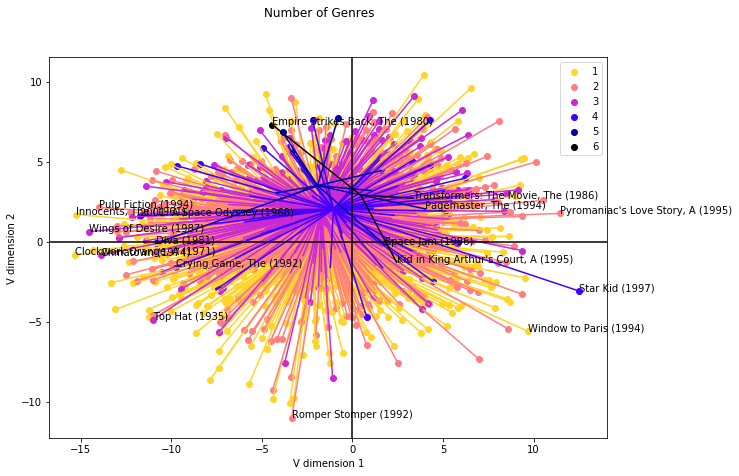

<Figure size 432x288 with 0 Axes>

In [9]:
from operator import itemgetter
import math

# Piazza post visualization
def visualization_t(V, inds, name, fig, color):
    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :2].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    avg_x = 0
    avg_y = 0
    plot_x = []
    plot_y = []
    names = []
    for i in inds:
        if i < len(proj[0]):
            plot_x.append(proj[0, i - 1])
            avg_x += proj[0, i - 1]
            plot_y.append(proj[1, i - 1])
            avg_y += proj[1, i - 1]
            names.append(movies[np.where(movies[:,0]==i)[0],1][0])
    
    avg_x = avg_x / len(plot_x)
    avg_y = avg_y / len(plot_y)
    
    # Plot points
    plt.scatter(plot_x, plot_y, label=name, c=color)
    
    # Plot lines to average point
    for i in range(len(plot_x)):
        plt.plot([avg_x, plot_x[i]],[avg_y,plot_y[i]], c=color)

    # Plot the outlier points
    sd_x = np.std(plot_x)
    sd_y = np.std(plot_y)
    
    max_x = 0
    max_y = 0
    
    outlier = []
    for i in range(len(plot_x)):
        max_x = abs(plot_x[i] - avg_x)
        max_y = abs(plot_y[i] - avg_y)
        outlier.append([names[i], plot_x[i], plot_y[i], math.sqrt(max_x**2 + max_y**2)])
        # print(movies[np.where(movies[:,0]==inds[i])])
    
    outlier.sort(key = lambda x:x[-1])
    temp = 0
    for i in reversed(outlier):
        if temp == 3:
            break
        plt.annotate(i[0], (i[1], i[2]))
        # print(i)
        temp += 1
            
        
    

def count_genre():
    name = 'Number of Genres'
    total_movies = []
    for i in range(18):
        total_movies.append([])
        
    for i in range(len(movies)):
        index = np.count_nonzero(movies[i][2:])
        total_movies[index].append((movies[i, 0]))
    
    total_movies = np.asarray(total_movies)
    
    fig = plt.figure()
    fig.set_size_inches(10, 7)
    cmap = plt.get_cmap('gnuplot2')
    for i in range(len(total_movies)):
        if len(total_movies[i]) > 0:
            color = cmap(1-float(i)/6)
            visualization_t(V2, total_movies[i], str(i), fig, color)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    plt.xlabel('V dimension 1')
    plt.ylabel('V dimension 2')
    plt.legend()
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()
    
count_genre()